## 1) 기술 통계란?

---

- 기술통계란 자료를 그래프나 숫자등으로 요약하는 통계적 행위 및 관련 방법을 의미.
- 데이터의 분석에 앞서 전체적으로 데이터의 특징을 파악하고 데이터를 다양한 각도로 접근한다.
- 데이터프레임 객체의 `describe()` 함수를 이용하여 데이터의 기초통계량을 확인한다 .
- 데이터를 요약하고 시각화해서 잘 설명하는 것이 중점을 두며 데이터에 대해서 쉽게 설명하기 위해서 시각화를 많이 활용한다.
- 기술 통계에서 기본적으로 사용하는 시각화 자료들은 **박스플롯(상자그림)**, **도수분포표**, **히스토그램**이 있으며 이를 기반으로 사실을 객관적으로 확인하는 것을 중점으로 한다.

## 2) 기술통계 절차

---

아래 절차에 따라 데이터의 기본 특성을 파악한 후 데이터 전처리와 데이터 정제 과정을 거쳐 분석을 진행하게 된다.

### 1. 데이터의 전체 크기와 형태

- 행과 열의 수를 확인한다.
- 10만건의 데이터 전체를 출력하는 것은 매우 부담이 큰 처리이므로 상위 n건, 하위 n건의 일부만을 확인한다.

### 2. 집단의 특성을 잘 나타내는 요약 통계량을 확인한다.

서열척도, 등간척도, 비율척도 등 수치화 되어 있고 연산이 가능한 종류

- 평균, 중앙값, 표준편차, 범위(최대값~최소값), 사분위수 등을 확인한다.
- 요약통계량을 상자그림으로 시각화하여 확인한다.

### 3. 전체 데이터의 데이터 분포를 확인한다.

성별, 학년 등과 같이 연산을 수행할 수 없는 명목척도

- 구간별 자료의 개수를 나타내는 표(=도수분포표)를 산정한다.
- 도수 분포표를 그래프로 표현한 히스토그램을 확인한다.

In [2]:
from pandas import DataFrame
from pandas import read_excel
from matplotlib import pyplot as plt

성적표 = read_excel("http://itpaper.co.kr/data/grade_card.xlsx", engine='openpyxl')


### 이름, 학년, 성별 데이터를 명목척도(카테고리)로 변환하기
- 기술통계량은 서열척도, 등간척도, 비율척도에 사용되므로 명목척도는 제외

In [3]:
성적표['이름'] = 성적표['이름'].astype('category')
성적표['학년'] = 성적표['학년'].astype('category')
성적표['성별'] = 성적표['성별'].astype('category')
성적표.dtypes

이름    category
학년    category
성별    category
국어       int64
영어     float64
수학     float64
과학     float64
dtype: object

## 기초 통계량 확인
- describe() 함수 호출

In [4]:
des = 성적표.describe()
des

,국어,영어,수학,과학
count,5.000000,4.000000,3.000000,4.000000
mean,92.200000,67.500000,60.333333,73.500000
std,20.474374,17.078251,28.536526,10.246951
min,63.000000,50.000000,31.000000,64.000000
25%,88.000000,57.500000,46.500000,68.500000
50%,92.000000,65.000000,62.000000,71.000000
75%,98.000000,75.000000,75.000000,76.000000
max,120.000000,90.000000,88.000000,88.000000


In [5]:
# 특정 컬럼 확인
성적표['국어'].describe()

count      5.000000
mean      92.200000
std       20.474374
min       63.000000
25%       88.000000
50%       92.000000
75%       98.000000
max      120.000000
Name: 국어, dtype: float64

- 각 기초통계함수를 사용해서 각각의 정보를 가져올 수 있음
- `max()`, `min()`, `std()` , `quantile(q = 0.25)`, `quantile(q = 0.50)`, `median()`, `quantile(q = 0.75)` ...quantile()은 응용가능

## Box plot

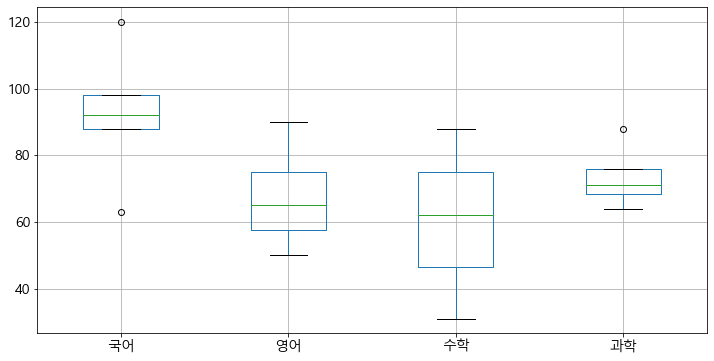

In [7]:
plt.rcParams["font.family"] = 'Malgun Gothic'  # 사용할 폰트이름 지정 (맑은고딕)
plt.rcParams["font.size"] = 14                 # 글자크기
plt.rcParams["figure.figsize"] = (12, 6) 

성적표.boxplot()
plt.show()

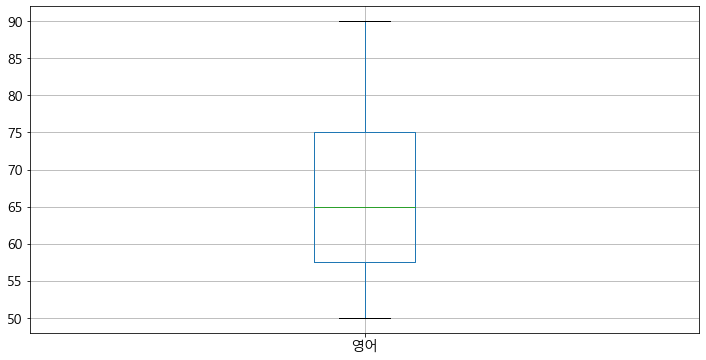

In [8]:
# 특정 컬럼에 대한 상자 그림
성적표.boxplot(['영어'])
plt.show()

# #06. 히스토그램과 도수분포표

---

자료가 가질 수 있는 범위를 몇 개의 **구간**으로 나누고 각 구간에 해당하는 값의 숫자 혹은 상대적 빈도를 표현하는 그래프

## 1) 히스토그램 작성 과정

---

1. **자료의 갯수와 구간(최대값, 최소값)을 확인한다.**
2. **자료를 몇 개의 구간으로 나눌지 분석가의 주관에 따라 결정한다.**
    - 구간은 자료의 개수나 분포에 따라 달라져야 한다.
    - 너무 많은 구간을 나누지 않도록 해야 한다. (일반적으로 5~15 사이의 값)
3. **Pyplot의 hist() 함수를 사용하여 히스토그램을 생성한다.**

    n, bins, patches = pyplot.hist(값, 구간의_수)

    - 값은 연속성 데이터(리스트, numpy 배열, 시리즈) 형식
    - 리턴값 `n`은 각 구간에 포함된 값의 갯수 혹은 빈도를 표현하는 리스트
    - 리턴값 `bins`는 각 구간별 경계값 리스트
    - 리턴값 `patches`는 각 구간을 그리는 matplot 객체 리스트 (사용안함)

In [9]:
성적표500건 = read_excel("http://itpaper.co.kr/data/grade500.xlsx", engine='openpyxl')
성적표500건

,이름,국어,영어,수학,과학
0,철수,98.0,NaN,88.0,64.0
1,영희,88.0,90.0,62.0,72.0
2,민철,92.0,70.0,NaN,NaN
3,호영,63.0,60.0,31.0,70.0
4,수현,120.0,50.0,NaN,88.0
...,...,...,...,...,...
500,학생496,54.0,50.0,23.0,88.0
501,학생497,64.0,54.0,73.0,83.0
502,학생498,89.0,36.0,63.0,14.0
503,학생499,83.0,26.0,81.0,98.0


In [10]:
# 인덱스 지정
성적표df = 성적표500건.set_index('이름')
성적표df

,국어,영어,수학,과학
이름,,,,
철수,98.0,NaN,88.0,64.0
영희,88.0,90.0,62.0,72.0
민철,92.0,70.0,NaN,NaN
호영,63.0,60.0,31.0,70.0
수현,120.0,50.0,NaN,88.0
...,...,...,...,...
학생496,54.0,50.0,23.0,88.0
학생497,64.0,54.0,73.0,83.0
학생498,89.0,36.0,63.0,14.0


In [11]:
# 자료 개수 카운트
count = len(성적표df['영어'])
count

505

In [12]:
# 최소 최대값 구하기
max_value = 성적표df['영어'].max()
min_value = 성적표df['영어'].min()
print('최대값 = ', max_value)
print('최소값 = ', min_value)

최대값 =  98.0
최소값 =  1.0


In [15]:
# 나눌 구간 정하기
step = 5

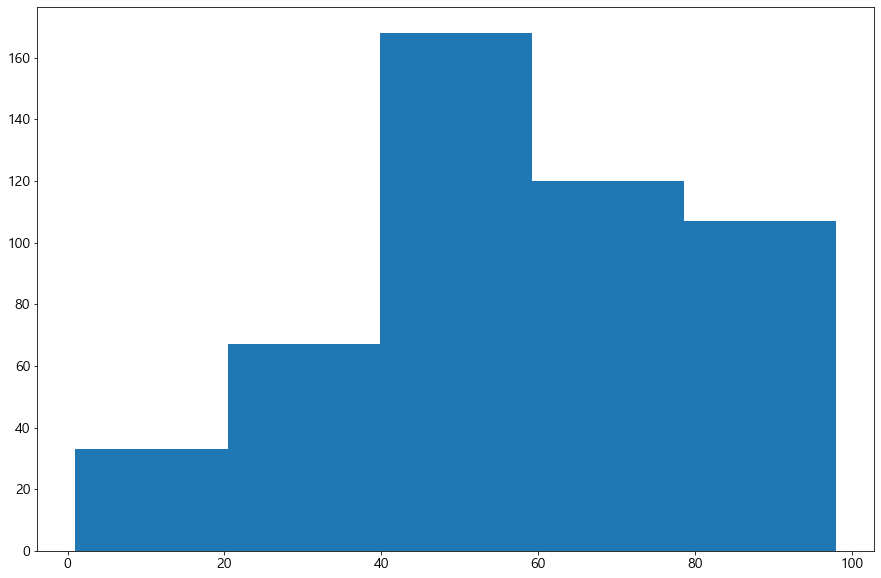

In [16]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (15, 10)

n, bins, patches = plt.hist(성적표df['영어'], bins=step)

In [17]:
print(n) # n은 구간별 도수를 의미한다.

[ 33.  67. 168. 120. 107.]


In [18]:
print(bins) # bins는 구간의 시작과 끝을 의미한다.

[ 1.  20.4 39.8 59.2 78.6 98. ]


In [19]:
print(patches)

<BarContainer object of 5 artists>


# #07. Wage 데이터셋에 대한 요약 통계량

---

## 1) 급여(`wage`)와 교육 수준(`education`)에 대한 요약 통계량

In [1]:
from pandas import DataFrame
from pandas import read_excel
from matplotlib import pyplot

wage = read_excel("http://itpaper.co.kr/data/wage.xlsx", engine='openpyxl')

In [4]:
# 요약 통계량 확인하기

wage.filter(['wage', 'education']).describe()


,wage
count,3000.000000
mean,111.703608
std,41.728595
min,20.085537
25%,85.383940
50%,104.921507
75%,128.680488
max,318.342430


In [5]:

# 명목 척도에 대한 빈도표 구하기
DataFrame(wage['education'].value_counts())

,education
2. HS Grad,971
4. College Grad,685
3. Some College,650
5. Advanced Degree,426
1. < HS Grad,268


### 해석

- wage의 최소값은 20.09이다.
- 교육수준은 5개의 그룹으로 구분된다.
- wage는 **양적 변수** 이다.
- education은 **순서형 변수**이다.

In [7]:
# 근로자의 수준에 따른 임금 분포
k = wage['education'].value_counts().sort_index()
k

# 교육수준별로 도수를 Series객체로 반환

1. < HS Grad          268
2. HS Grad            971
3. Some College       650
4. College Grad       685
5. Advanced Degree    426
Name: education, dtype: int64

<bound method Series.keys of 1. < HS Grad          268
2. HS Grad            971
3. Some College       650
4. College Grad       685
5. Advanced Degree    426
Name: education, dtype: int64>


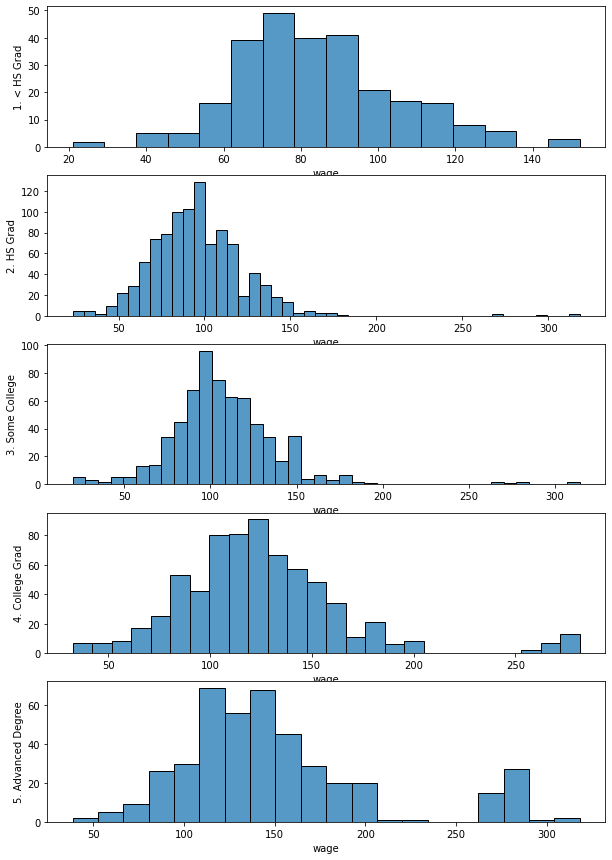

In [22]:
# 교육 수준별로 데이터를 조회하여 히스토그램 서브플롯
import seaborn as sns

key_list = list(k.index)

fig, ax = pyplot.subplots(5,1, figsize= (10,15))
print(k.keys)
for i, v in enumerate(key_list):
    tmp = wage.query('education == @v')
    sns.histplot(data=tmp, x='wage', ax=ax[i])
    ax[i].set_ylabel(v)
    
pyplot.show()
pyplot.close()